In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
print('Hello & Welcome to Capstone Project Course!')

Hello & Welcome to Capstone Project Course!


In [3]:
df = pd.read_csv('C:/Users/akash/Downloads/Data-Collisions.csv')
df.head()

C:\Users\akash\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [4]:
df.columns

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

<BR>
<P>
We have to build a model which can predict the Severity of the car accident depend upon various attributes
In this project attributes 'WEATHER', 'ROADCOND' & 'LIGHTCOND' are taken as Independent variables where as SeverityCode is dependend which we have predict from this model.

Note - SEVERITYCODE 1-> Property Damage Only Collision, 
       SEVERITYCODE 2-> Injury Collision
</P>

In [5]:
df['WEATHER'].unique()

array(['Overcast', 'Raining', 'Clear', nan, 'Unknown', 'Other', 'Snowing',
       'Fog/Smog/Smoke', 'Sleet/Hail/Freezing Rain', 'Blowing Sand/Dirt',
       'Severe Crosswind', 'Partly Cloudy'], dtype=object)

In [6]:
df['ROADCOND'].unique()

array(['Wet', 'Dry', nan, 'Unknown', 'Snow/Slush', 'Ice', 'Other',
       'Sand/Mud/Dirt', 'Standing Water', 'Oil'], dtype=object)

In [7]:
df['LIGHTCOND'].unique()

array(['Daylight', 'Dark - Street Lights On', 'Dark - No Street Lights',
       nan, 'Unknown', 'Dusk', 'Dawn', 'Dark - Street Lights Off',
       'Other', 'Dark - Unknown Lighting'], dtype=object)

<BR>
<P>
    As we can see from above data insights our data contains NaN values, this should be removed from data set
    </P>

In [8]:
df.dropna(subset = ["WEATHER"], inplace=True)
df.dropna(subset = ["ROADCOND"], inplace=True)
df.dropna(subset = ["LIGHTCOND"], inplace=True)

In [10]:
print(df['LIGHTCOND'].count())
print(df['ROADCOND'].count())
print(df['WEATHER'].count())
print(df['SEVERITYCODE'].count())

189337
189337
189337
189337


In [11]:
df['SEVERITYCODE'].value_counts()

1    132285
2     57052
Name: SEVERITYCODE, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000240446D1D88>]],
      dtype=object)

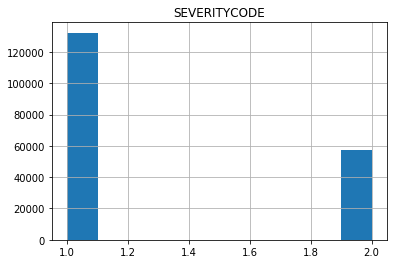

In [12]:
df.hist(column='SEVERITYCODE')

<br>
<p>
    As we can see that our data is biased i.e. almost 66% of output contains value 1 so this must not be a good dataset to build a model as it is not balanced.
    To get over this probelm we can use downsampling method to randomly drop majority of class and make dataset balanced.
    </p>

In [13]:
 from sklearn.utils import resample

In [14]:
df_majority = df[df.SEVERITYCODE==1]
df_minority = df[df.SEVERITYCODE==2]

In [15]:
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=57052,     # to match minority class
                                 random_state=100) # reproducible results
 
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
 

df_downsampled.count()

SEVERITYCODE      114104
X                 111296
Y                 111296
OBJECTID          114104
INCKEY            114104
COLDETKEY         114104
REPORTNO          114104
STATUS            114104
ADDRTYPE          113234
INTKEY             42994
LOCATION          112868
EXCEPTRSNCODE      49125
EXCEPTRSNDESC       2331
SEVERITYCODE.1    114104
SEVERITYDESC      114104
COLLISIONTYPE     114085
PERSONCOUNT       114104
PEDCOUNT          114104
PEDCYLCOUNT       114104
VEHCOUNT          114104
INCDATE           114104
INCDTTM           114104
JUNCTIONTYPE      111218
SDOT_COLCODE      114104
SDOT_COLDESC      114104
INATTENTIONIND     18738
UNDERINFL         114104
WEATHER           114104
ROADCOND          114104
LIGHTCOND         114104
PEDROWNOTGRNT       4405
SDOTCOLNUM         68436
SPEEDING            6033
ST_COLCODE        114088
ST_COLDESC        114085
SEGLANEKEY        114104
CROSSWALKKEY      114104
HITPARKEDCAR      114104
dtype: int64

In [16]:
print(df_downsampled['LIGHTCOND'].count())
print(df_downsampled['ROADCOND'].count())
print(df_downsampled['WEATHER'].count())
print(df_downsampled['SEVERITYCODE'].count())

114104
114104
114104
114104


In [18]:
df_downsampled['SEVERITYCODE'].value_counts()

2    57052
1    57052
Name: SEVERITYCODE, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002404F1839C8>]],
      dtype=object)

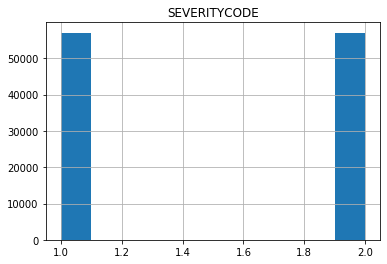

In [19]:
df_downsampled.hist(column='SEVERITYCODE')

In [20]:
import itertools
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [21]:
X = df_downsampled[['WEATHER', 'ROADCOND','LIGHTCOND']] .values
X[0:5]


array([['Clear', 'Dry', 'Daylight'],
       ['Clear', 'Dry', 'Daylight'],
       ['Clear', 'Dry', 'Daylight'],
       ['Clear', 'Dry', 'Daylight'],
       ['Raining', 'Wet', 'Unknown']], dtype=object)

<br>
<p>
    We have to encode our data set into numeric values in order to simplified our data set to train models. Also decision tree algorithm takes only numeric values so encoding it to fit into decision tree algorithm
    </p>

In [22]:
cleanup_weather = {"WEATHER":     {"Clear": 1, "Raining": 2, "Overcast": 3, "Unknown": 4, "Other":11, "Fog/Smog/Smoke":5,
                                   "Snowing":6, "Sleet/Hail/Freezing Rain":7, "Blowing Sand/Dirt":8, "Severe Crosswind":9,
                                   "Partly Cloudy":10} }
df_downsampled.replace(cleanup_weather, inplace=True)

In [23]:
cleanup_road = {"ROADCOND":     {"Dry": 1, "Wet": 2, "Unknown": 3, "Snow/Slush":4, "Ice":5,
                                   "Other":9, "Sand/Mud/Dirt":6, "Standing Water":7, "Oil":8} }
df_downsampled.replace(cleanup_road, inplace=True)

In [24]:
cleanup_light = {"LIGHTCOND":     {"Daylight": 1, "Dark - Street Lights On": 2, "Unknown":3, "Dusk":4,
                                   "Dark - No Street Lights":5, "Dark - Street Lights Off":6, "Dawn":7, "Other":9, "Dark - Unknown Lighting":8} }

df_downsampled.replace(cleanup_light, inplace=True)

In [25]:
X = df_downsampled[['WEATHER', 'ROADCOND','LIGHTCOND']] .values.astype(float)
X[0:5]

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [2., 2., 3.]])

In [26]:
y = df_downsampled['SEVERITYCODE'].values
y[0:5]

array([1, 1, 1, 1, 1], dtype=int64)

<h3> Preprocessing - Normalize Data </h3>

In [27]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-0.63352913, -0.58240603, -0.55194238],
       [-0.63352913, -0.58240603, -0.55194238],
       [-0.63352913, -0.58240603, -0.55194238],
       [-0.63352913, -0.58240603, -0.55194238],
       [ 0.23005705,  0.77223974,  1.2532294 ]])

<h3> Train - Test Split </h3>
<br>
<p>
    We will be using our 80% data to training and 20% data for testing </p>
    


In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (91283, 3) (91283,)
Test set: (22821, 3) (22821,)


<h3>K nearest neighbor (KNN) - Algorithm</h3>

In [40]:
from sklearn.neighbors import KNeighborsClassifier

<h4> Training our Data Set </h4>

In [45]:

k = 15
 
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform')

<h4> Prediction </h4>

In [46]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([2, 2, 2, 2, 2], dtype=int64)

<h4> Accuracy Evaluation </h4>

In [47]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.55849391452954
Test set Accuracy:  0.5603610709434294


<h3>Decision Tree - Algorithm</h3>

In [48]:
from sklearn.tree import DecisionTreeClassifier

In [49]:

acciTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
acciTree

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

<h4> Modelling & Training </h4>

In [50]:
from sklearn.tree import DecisionTreeClassifier
acciTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
acciTree

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [51]:
acciTree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

<h4> Prediction </h4>

In [52]:
predTree = acciTree.predict(X_test)
print (predTree [0:5])
print (y_test [0:5])

[2 2 1 2 2]
[1 2 2 1 1]


<h4> Result and Evaluation </h4>

In [53]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))

DecisionTrees's Accuracy:  0.5596161430261601
